# STOCK/CRPYTO PRICE PREDICTION MODEL

## The following code is an example on how to use simple data analysis tolls in order to set up a simple strategy for long and short term financial trading

### We will make use of the programing language python (3.x) which suits nicely for data anlysis

## --> This a very is simplified model for trading. One should always invest just as much money as one can afford to loose and do own studies in advance. 

## Required modules:
- numpy: the code is designed to be vectorized such that the numpy module can be used and calculations performed fast
- pandas: module for illustrative data frames
- yfinance: api module provided by yahoo finance to get current and previous asset prices
- matplotlib: (sub)module(s) for plots
- scipy: (sub)module for statistical and signal analysis

### CELLS YOU DO NOT NEED TO EXECUTE:

In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np

### CELLS YOU CAN EXECUTE OPTIONALLY: 

#### --> This does not toggle the output of a cell:

In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999

<IPython.core.display.Javascript object>

### CELLS YOU NEED TO EXECUTE IN ORDER TO BE UP-TO-DATE:

In [ ]:
your_path_to_folder_called_FINANCE = '###INSERT YOUR PATH HERE###'
import sys
sys.path.append(your_path_to_folder_called_FINANCE)

In [3]:
from model import MODEL
import utils, plotting, statistics
import pandas as pd

### CELLS YOU CAN MODIFY:

#### WARNING: Do not mix tickers from different markets/timezones. This can result in various NaN values if a filter is applied!

In [4]:
start_date = '2020-01-01' #your start date for the model.
day_hour = 16 #your intra-day time at which to evaluate the model.
tickers = ['BTC-USD', 'LTC-USD', 'XRP-USD'] #your tickers of interest.

### The main part starts here:

In [20]:
model = MODEL(tickers=tickers)
model.get_data(start=start_date, interval='60m')

[*********************100%***********************]  3 of 3 completed


In [21]:
start_date_range = pd.Timestamp(2020, 1, 1, day_hour)
date_range = utils.create_date_range(start_date=start_date_range)
model.apply_date_filter(date_range)
model.data.tail()

[INFO]: filter applied.


,BTC-USD,LTC-USD,XRP-USD
Datetime,,,
2020-04-15 16:00:00+01:00,6723.213379,40.379490,0.183197
2020-04-16 16:00:00+01:00,7053.479492,42.675785,0.189295
2020-04-17 16:00:00+01:00,7087.016113,42.438065,0.189091
2020-04-18 16:00:00+01:00,7233.656738,43.707947,0.194079
2020-04-19 16:00:00+01:00,7176.044434,42.798916,0.191936


In [22]:
model.eval_model()

|                                  PRICE MODEL                                   |
|                                  Version 0.3                                   |
|                   Authors: Marco Rosenzweig & Patrick Lorenz                   |
----------------------------------------------------------------------------------
|                   ticker = ['BTC-USD', 'LTC-USD', 'XRP-USD']                   |
|                             start date = 01/01/20                              |
|                              end date = 04/19/20                               |
|                      initial investment per ticker = 200                       |
[INIT]: Initialising model for tickers: ['BTC-USD', 'LTC-USD', 'XRP-USD']
[WARNING]: Ignoring second entry of gradient!
[INIT]: Successfully initialized model.
**********************************************************************************
[TICKER]: BTC-USD
[INFO]: No tax paid.
------------------------------------------------------

In [23]:
model.ticker_df['BTC-USD']

,Buy Dates,Sell Dates,Buy Prices,Sell Prices,Trade Reward,Trade Win,Trade Efficiency
0,2020-01-05 16:00:00,2020-01-08 16:00:00,7548.554559,8144.917852,215.800728,15.800728,0.079004
1,2020-01-10 16:00:00,2020-01-11 16:00:00,8003.403498,8091.135632,218.166304,2.365576,0.010962
2,2020-01-13 16:00:00,2020-01-15 16:00:00,8118.115083,8742.038287,234.933622,16.767318,0.076856
3,2020-01-17 16:00:00,2020-01-18 16:00:00,8911.138670,8852.169966,233.378969,-1.554653,-0.006617
4,2020-01-20 16:00:00,2020-01-22 16:00:00,8696.341779,8646.965923,232.053896,-1.325073,-0.005678
5,2020-01-24 16:00:00,2020-01-29 16:00:00,8500.032918,9303.116300,253.978356,21.924460,0.094480
6,2020-02-04 16:00:00,2020-02-06 16:00:00,9234.738458,9728.732426,267.564423,13.586067,0.053493
7,2020-02-08 16:00:00,2020-02-09 16:00:00,9851.528814,10029.694143,272.403337,4.838914,0.018085
8,2020-02-11 16:00:00,2020-02-12 16:00:00,10151.364573,10283.477400,275.948474,3.545137,0.013014
9,2020-02-16 16:00:00,2020-02-19 16:00:00,9756.431564,10105.129716,285.810965,9.862491,0.035740


[INFO]: New sell signal was detected for last value: 7176.04443359375.


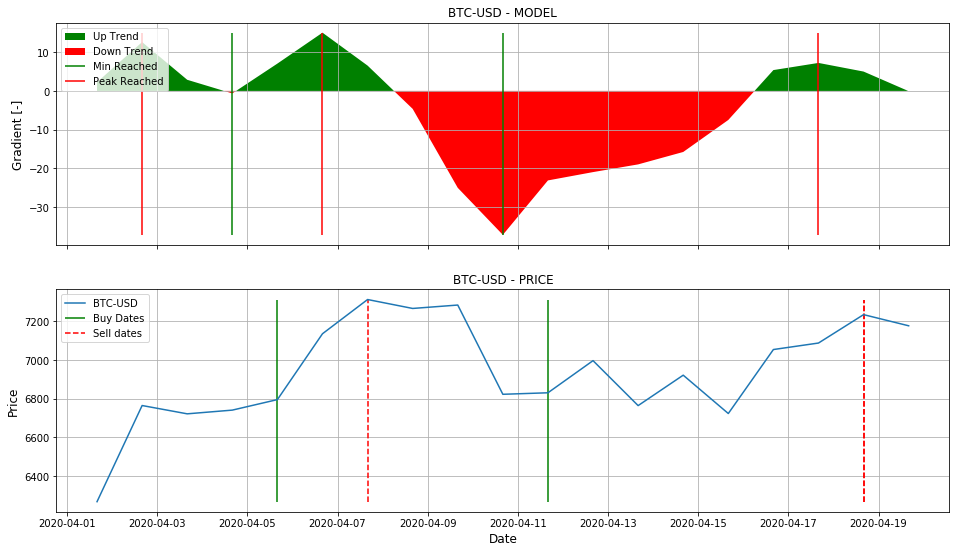

[INFO]: New sell signal was detected for last value: 42.79891586303711.


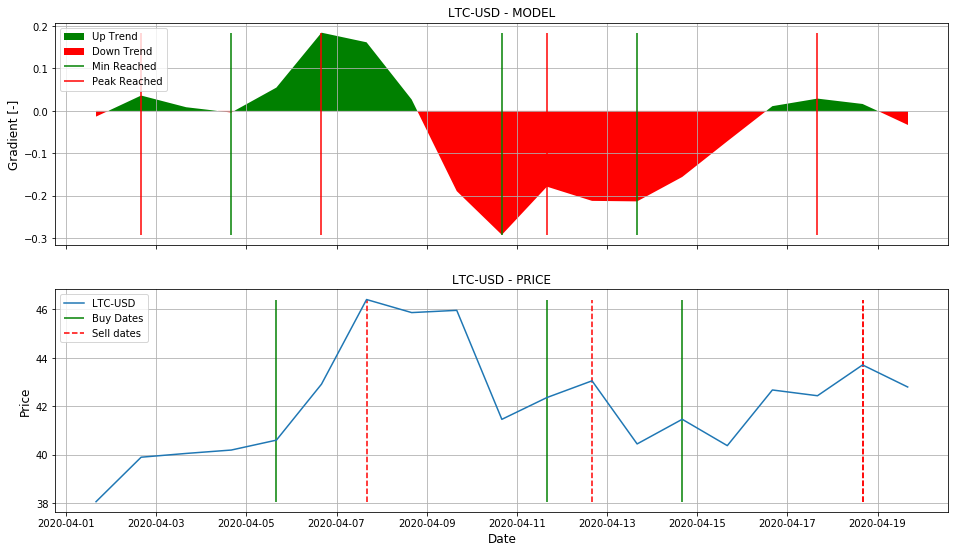

[INFO]: New sell signal was detected for last value: 0.19193604588508606.


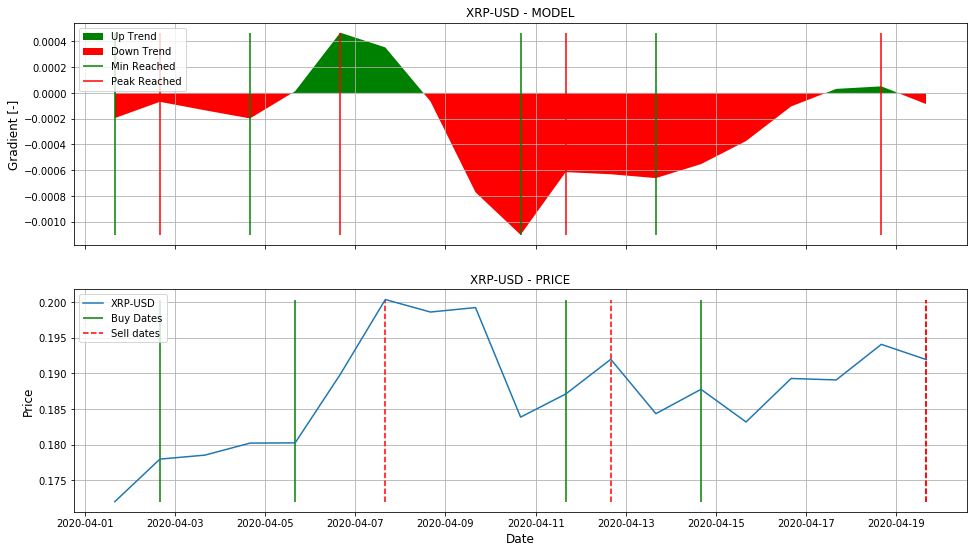

In [24]:
plotting.plot_model(model, tickers='all', plot_from_date='2020-04-01')

In [25]:
imag_model = model.copy_model()

In [26]:
imag_model.append_timedelta(timedelta=1)

[USER-INPUT]: Overwrite existing data? y


In [27]:
imag_model.data.tail(5)

,BTC-USD,LTC-USD,XRP-USD
2020-04-16 16:00:00+01:00,7053.479492,42.675785,0.189295
2020-04-17 16:00:00+01:00,7087.016113,42.438065,0.189091
2020-04-18 16:00:00+01:00,7233.656738,43.707947,0.194079
2020-04-19 16:00:00+01:00,7176.044434,42.798916,0.191936
2020-04-20 16:00:00+01:00,NaN,NaN,NaN


In [28]:
imag_model.comp_break_values()

[INFO]: Compute break values with 30.00% deviation
[INFO]: Current ticker: BTC-USD
[INFO]: Current ticker: LTC-USD
[INFO]: Current ticker: XRP-USD
[USER-INPUT]: Append breaking values w.r.t smallest tolerances? n
[INFO]: Current values: {'BTC-USD': 7176.04443359375, 'LTC-USD': 42.79891586303711, 'XRP-USD': 0.19193604588508606}
[INFO]: Break values: {'BTC-USD': [7220.5359090824295, 7378.408886621521], 'LTC-USD': [42.84171477890047, 44.37391596679724], 'XRP-USD': [0.1924350796043762, 0.1967344470322013]}
[INFO]: Tolerances: {'BTC-USD': array([ 44.49147549, 202.36445303]), 'LTC-USD': array([0.04279892, 1.5750001 ]), 'XRP-USD': array([0.00049903, 0.0047984 ])}


In [29]:
imag_model._init_model()
imag_model.data.tail(5)

[INIT]: Initialising model for tickers: ['BTC-USD', 'LTC-USD', 'XRP-USD']
[WARNING]: Ignoring second entry of gradient!
[INIT]: Successfully initialized model.
**********************************************************************************


,BTC-USD,LTC-USD,XRP-USD
2020-04-16 16:00:00+01:00,7053.479492,42.675785,0.189295
2020-04-17 16:00:00+01:00,7087.016113,42.438065,0.189091
2020-04-18 16:00:00+01:00,7233.656738,43.707947,0.194079
2020-04-19 16:00:00+01:00,7176.044434,42.798916,0.191936
2020-04-20 16:00:00+01:00,NaN,NaN,NaN


[INFO]: Current ticker: BTC-USD
----------------------------------------------------------------------------------
[INFO]: Result for value: 7130.2792102189
[INFO]: New sell signal was detected for last value: 7130.2792102189.


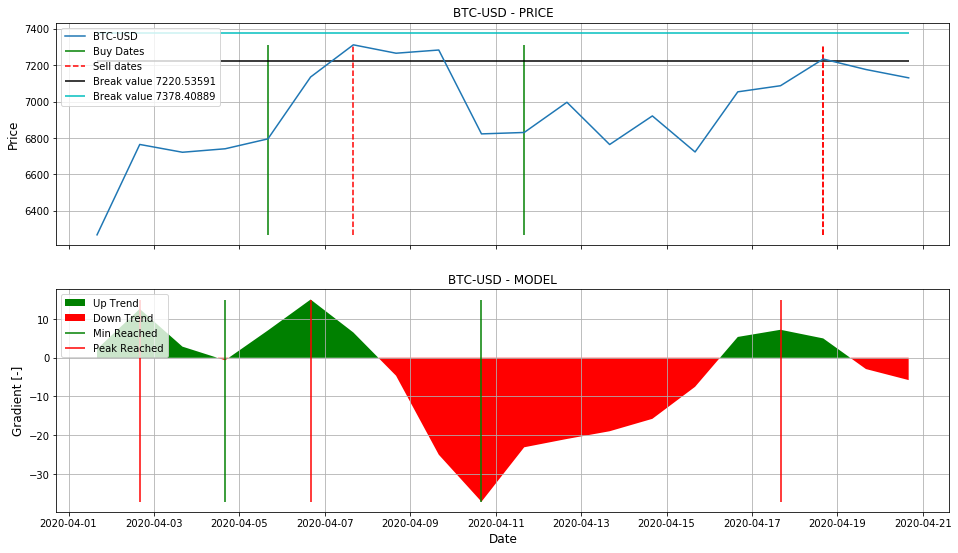

----------------------------------------------------------------------------------
[INFO]: Result for value: 7299.472397851975


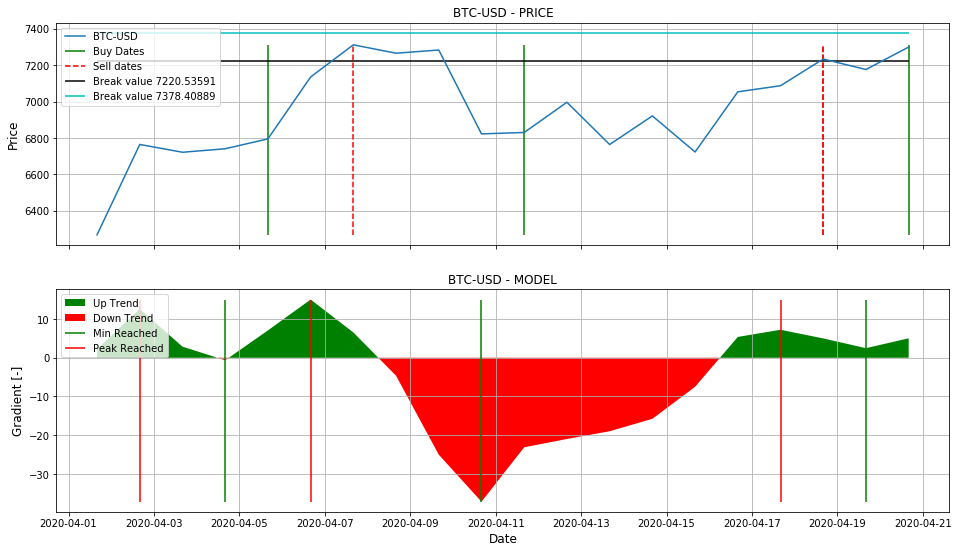

----------------------------------------------------------------------------------
[INFO]: Result for value: 7470.638997704289


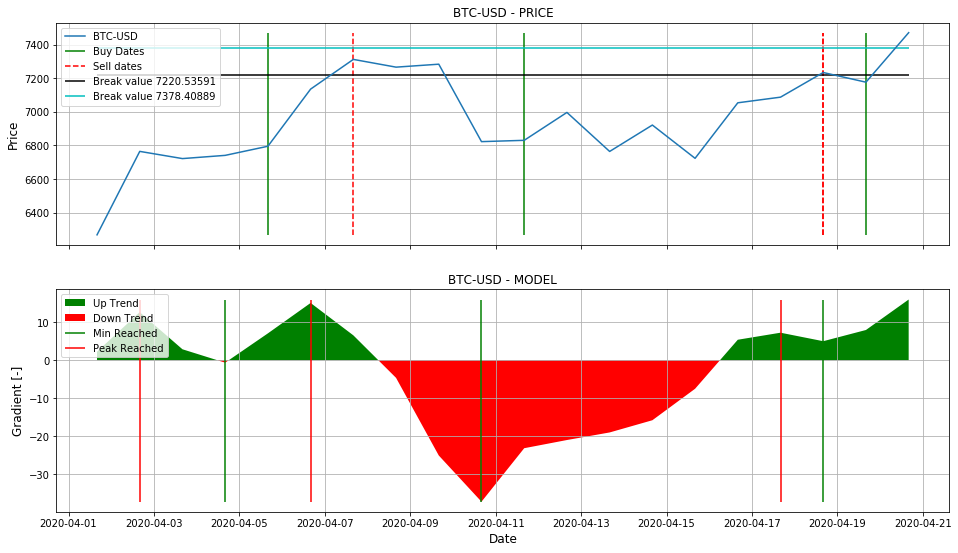

[INFO]: Current ticker: LTC-USD
----------------------------------------------------------------------------------
[INFO]: Result for value: 42.306193344164214
[INFO]: New sell signal was detected for last value: 42.306193344164214.


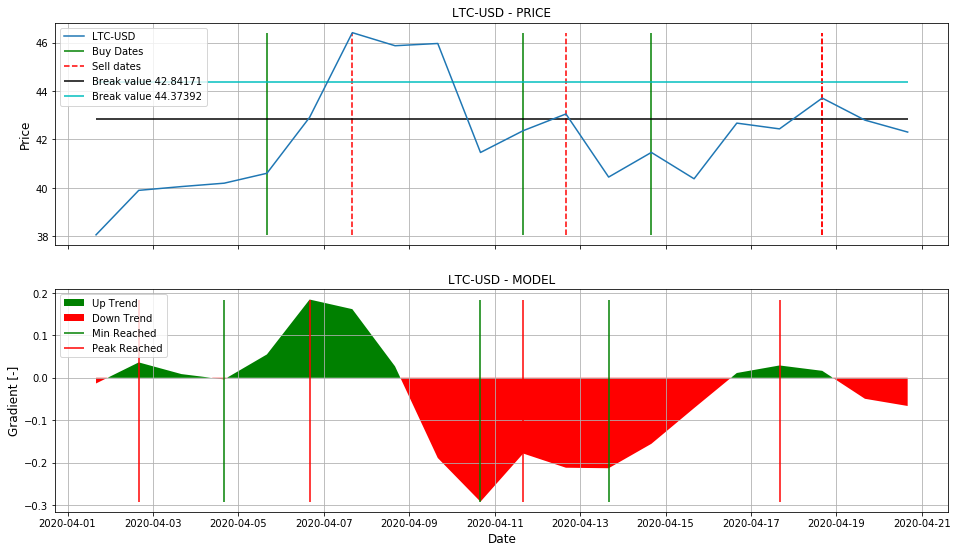

----------------------------------------------------------------------------------
[INFO]: Result for value: 43.607815372848854


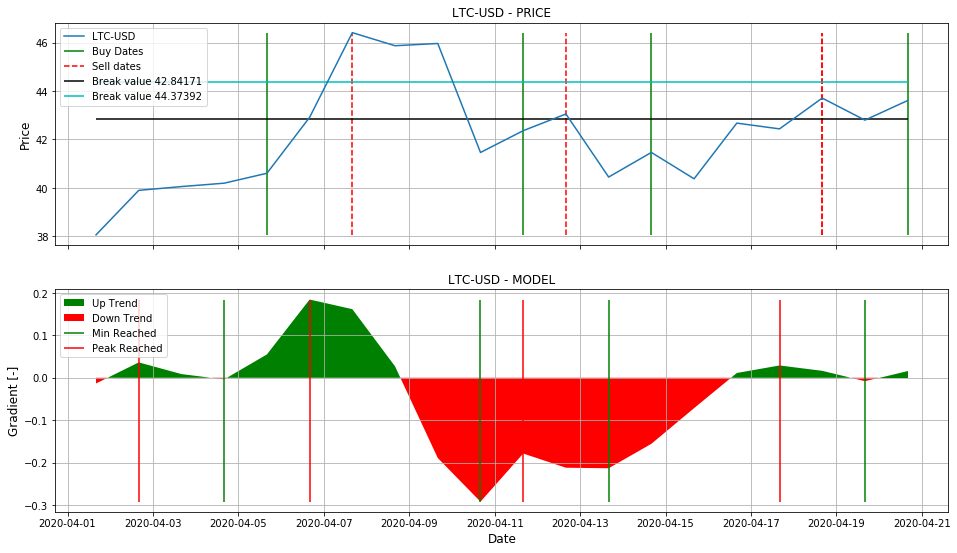

----------------------------------------------------------------------------------
[INFO]: Result for value: 44.92858991638221


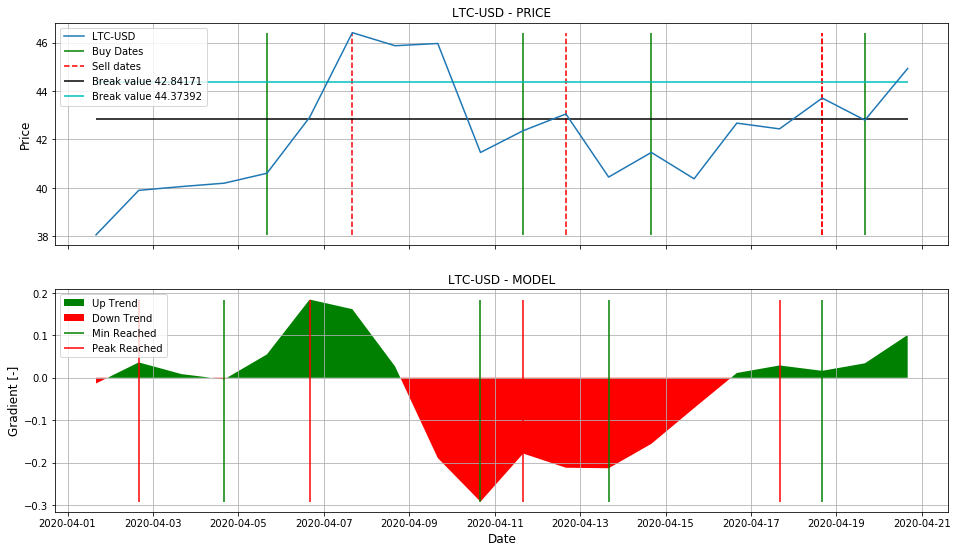

[INFO]: Current ticker: XRP-USD
----------------------------------------------------------------------------------
[INFO]: Result for value: 0.1900296411093215
[INFO]: New sell signal was detected for last value: 0.1900296411093215.


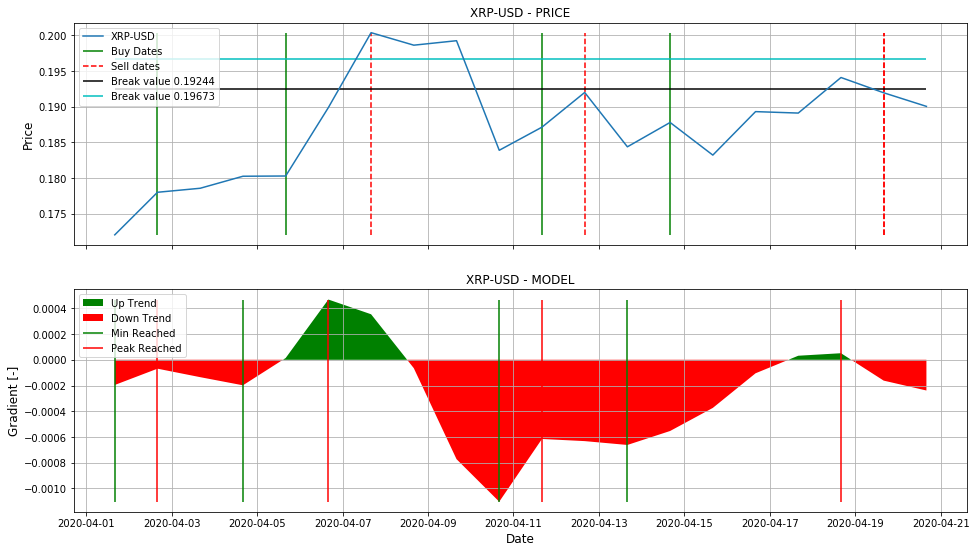

----------------------------------------------------------------------------------
[INFO]: Result for value: 0.19458476331828875


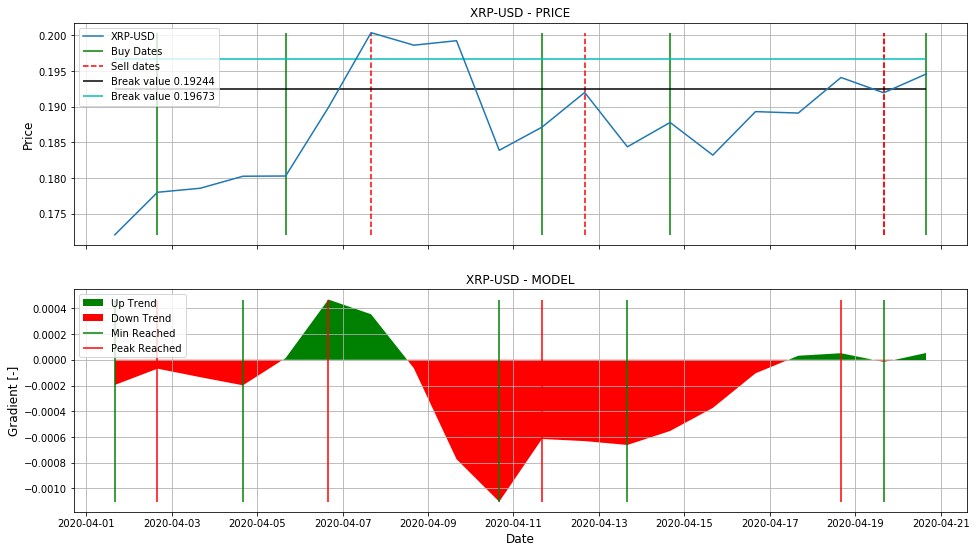

----------------------------------------------------------------------------------
[INFO]: Result for value: 0.1991936276201038


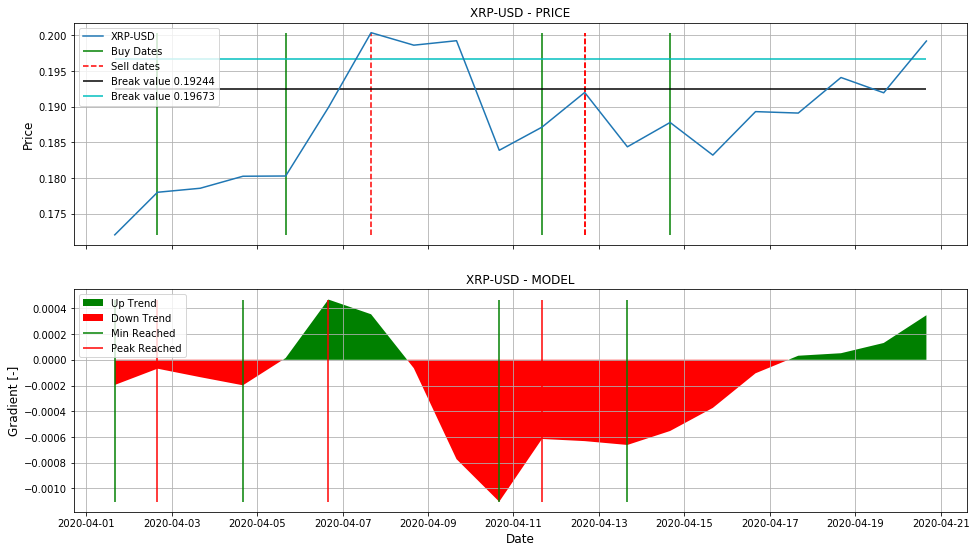

In [30]:
imag_model.show_possibilities(plot_from_date='2020-04-01', switch_axes=True)

[INFO]: Current ticker: LTC-USD
[*********************100%***********************]  1 of 1 completed
[STATS-INFO]: Auto update of tolerances!
[*********************100%***********************]  1 of 1 completed
[STATS-INFO]: Current value: 43.29389953613281!
[STATS-INFO]: New tolerances: [-0.45218476  1.08001643]!
z values [-0.61400904 -0.44412396 -0.3624921  -0.3131419  -0.28247858 -0.25905084
 -0.23549435 -0.21747306 -0.21805495 -0.20052974 -0.18902528 -0.19038785
 -0.17762053 -0.17231756 -0.15598229 -0.15212716 -0.15162604 -0.1465225
 -0.15100268 -0.12746699 -0.13519801 -0.13599079 -0.12752731 -0.12998313]
mean values [ 0.00058392  0.00167533  0.00411607  0.00362133 -0.00104782  0.00455425
 -0.00424479  0.00220263  0.00930187 -0.00804417 -0.00834883  0.01444574
 -0.00147117  0.03006604 -0.01954772  0.00097185  0.01195833  0.00487696
  0.02518452 -0.03638959  0.00212818  0.03619343  0.01756064  0.02963864]
stds [0.73739741 1.02192209 1.25878836 1.45558959 1.59706599 1.76312496
 1.902

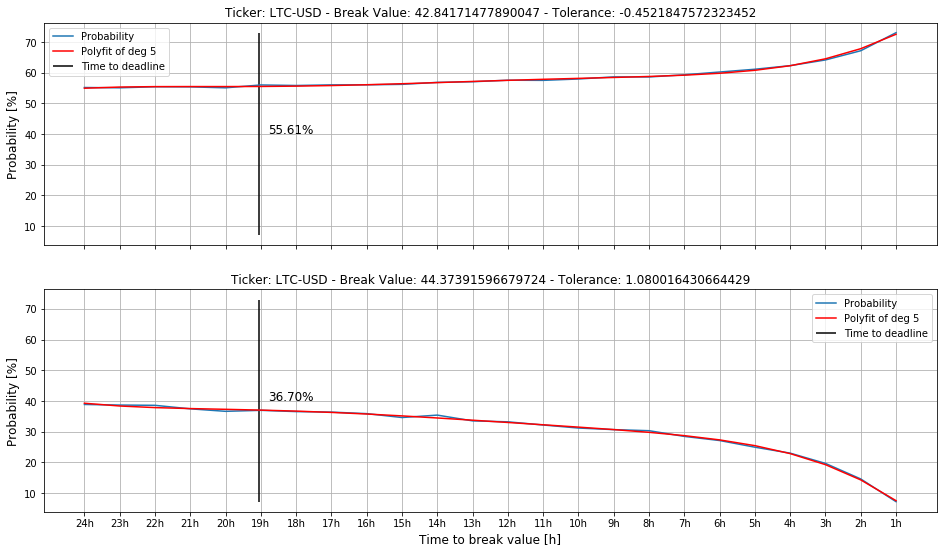

In [37]:
statistics.calc_probs(model=imag_model, tickers='LTC-USD', auto_update_tolerances=True)

In [ ]:
#TODO: Implement this: 
#from model import STATISTICAL_MODEL
#stat_model = STATISTICAL_MODEL(imag_model)